In [1]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 25)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 25)

import string
import unicodedata
from nltk import tokenize, corpus, stem

from sklearn import feature_extraction, linear_model, ensemble, cross_validation, metrics, decomposition

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_excel(os.path.join('..','..', 'datasets', 'Churn.xls'))

In [3]:
df

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,Area Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02,WV,415,330-8173


In [ ]:
#at that point I went back and made the rows/cols show more to see them all

In [4]:
#no nulls! that's great.
df.isnull().sum()

Account Length    0
VMail Message     0
Day Mins          0
Eve Mins          0
Night Mins        0
Intl Mins         0
CustServ Calls    0
Churn             0
Int'l Plan        0
VMail Plan        0
Day Calls         0
Day Charge        0
Eve Calls         0
Eve Charge        0
Night Calls       0
Night Charge      0
Intl Calls        0
Intl Charge       0
State             0
Area Code         0
Phone             0
dtype: int64

In [5]:
df.columns

Index([u'Account Length', u'VMail Message', u'Day Mins', u'Eve Mins',
       u'Night Mins', u'Intl Mins', u'CustServ Calls', u'Churn', u'Int'l Plan',
       u'VMail Plan', u'Day Calls', u'Day Charge', u'Eve Calls', u'Eve Charge',
       u'Night Calls', u'Night Charge', u'Intl Calls', u'Intl Charge',
       u'State', u'Area Code', u'Phone'],
      dtype='object')

In [6]:
# I want to see correlation with my outcome, Churn
df.corr().Churn

Account Length    0.016541
VMail Message    -0.089728
Day Mins          0.205151
Eve Mins          0.092796
Night Mins        0.035493
Intl Mins         0.068239
CustServ Calls    0.208750
Churn             1.000000
Int'l Plan        0.259852
VMail Plan       -0.102148
Day Calls         0.018459
Day Charge        0.205151
Eve Calls         0.009233
Eve Charge        0.092786
Night Calls       0.006141
Night Charge      0.035496
Intl Calls       -0.052844
Intl Charge       0.068259
Area Code         0.006174
Name: Churn, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1183ceb90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b4ed1d0>]], dtype=object)

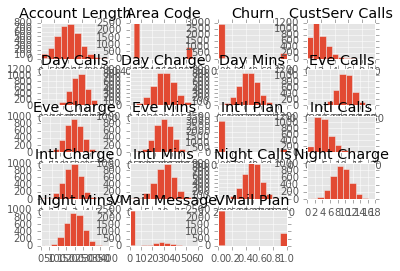

In [7]:
df.hist()

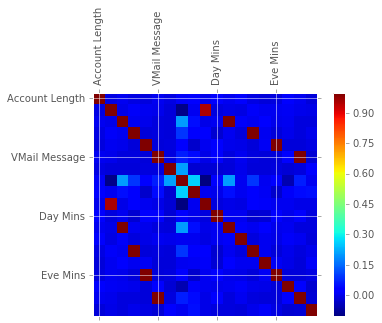

In [8]:
# I like this correlation visualization better, but can't figure out how to size it better. oh well!
corr = df.corr()
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

In [ ]:
#I've decided that I will use logistic regression and random forest since this is a classification problem
#I'll set up a training and testing set and put in features that appear to be correlated to churn == 1
# This is the kitchen sink method for sure!

In [9]:
X = df[ ["VMail Message", "Day Mins", "CustServ Calls", "Intl Calls", "Day Charge", "Int'l Plan", "VMail Plan"] ]

In [10]:
c = df.Churn

In [11]:
train_X, test_X, train_c, test_c = cross_validation.train_test_split(X, c, train_size = .6, random_state = 0)

In [12]:
train_X

,VMail Message,Day Mins,CustServ Calls,Intl Calls,Day Charge,Int'l Plan,VMail Plan
3022,33,146.6,0,7,24.92,0,1
442,29,133.1,1,3,22.63,0,1
1364,0,245.0,1,8,41.65,0,0
3038,28,110.0,2,3,18.70,0,1
157,23,157.6,0,2,26.79,0,1
1717,0,129.9,1,3,22.08,0,0
2706,0,206.0,0,3,35.02,0,0
505,0,159.3,1,5,27.08,0,0
1245,0,140.1,2,5,23.82,0,0
1869,0,239.0,1,8,40.63,0,0


In [13]:
#logistic regression is below

In [14]:
model = linear_model.LogisticRegression().\
    fit(train_X, train_c)

In [15]:
model.fit(train_X, train_c)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
model.score(train_X, train_c)

0.85242621310655331

In [17]:
cross_validation.cross_val_score(model, train_X, train_c, cv = 5).mean()

0.85192193076206713

In [18]:
#it looks like it is really good and we may be able to predict churn with those 6 features

In [21]:
model.fit(train_X, train_c)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
model.score(train_X, train_c)

0.85242621310655331

In [23]:
cross_validation.cross_val_score(model, train_X, train_c).mean()

0.85042388715552131

In [24]:
train_c_hat = cross_validation.cross_val_predict(model, train_X, train_c)

In [25]:
pd.crosstab(train_c_hat, train_c, rownames = ['Predicted'], colnames = ['True'])

True,0,1
Predicted,,
0,1654,255
1,44,46


In [ ]:
#OMG IT IS SO BAD!! it's only predicted churn ==1 for 15% of cases when churn == 1
#To add insult to injury, I'll see how poorly it does with my test set

In [26]:
#test set
model.fit(test_X, test_c)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
model.score(test_X, test_c)

0.86806596701649175

In [28]:
test_c_hat = cross_validation.cross_val_predict(model, test_X, test_c)

In [29]:
pd.crosstab(test_c_hat, test_c, rownames = ['Predicted'], colnames = ['True'])

True,0,1
Predicted,,
0,1134,158
1,18,24


In [30]:
#this looks just as bad, the model only predicts churn == 1 correctly for 13%
#next i'll be trying random forest

In [31]:
rfmodel = ensemble.RandomForestClassifier(n_estimators = 100)

In [32]:
rfmodel.fit(train_X, train_c)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfmodel.score(train_X, train_c)

0.9994997498749375

In [34]:
cross_validation.cross_val_score(rfmodel, train_X, train_c).mean()

0.89695017356186779

In [35]:
rftrain_c_hat = cross_validation.cross_val_predict(rfmodel, train_X, train_c)

In [36]:
pd.crosstab(rftrain_c_hat, train_c, rownames = ['Predicted'], colnames = ['True'])

True,0,1
Predicted,,
0,1633,136
1,65,165


In [37]:
#this is way better but still barely better than 50/50
#this is not something you could make a decision off of very well
#i would never take an analysis/model like this to my boss! 

In [ ]:
#instead i am going to spend some time looking into correlations and feature relationships more
#maybe i will have better luck if i choose fewer features? doubt it but i'll try 

In [38]:
true_df = df[(df.Churn == 1)]

In [39]:
false_df = df[(df.Churn == 0)]

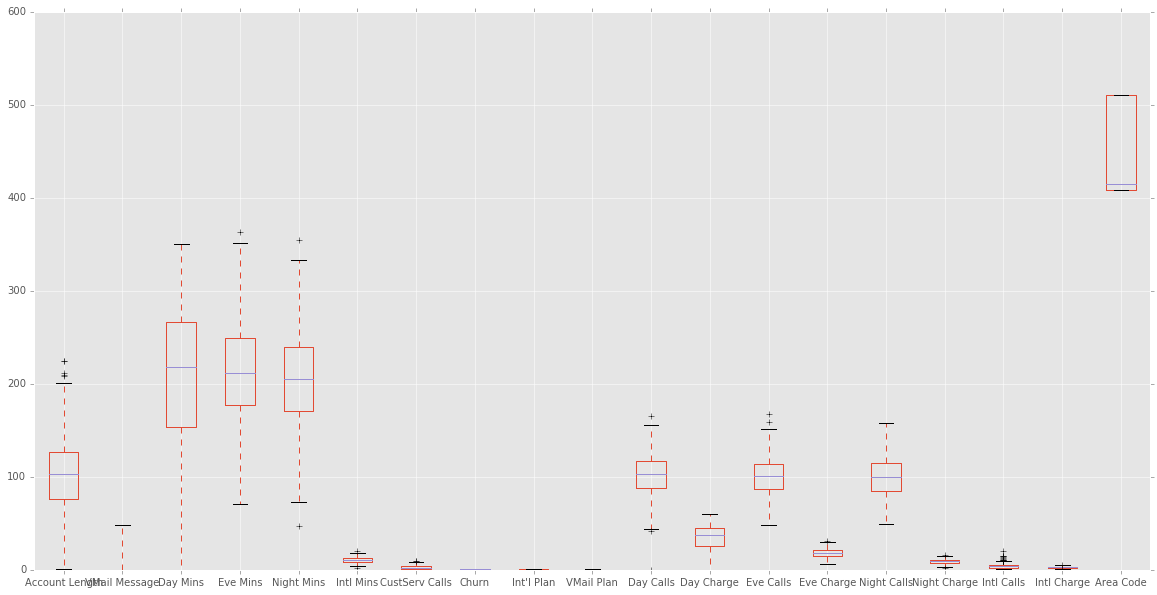

In [40]:
true_df.plot(kind = 'box', figsize = (20, 10))

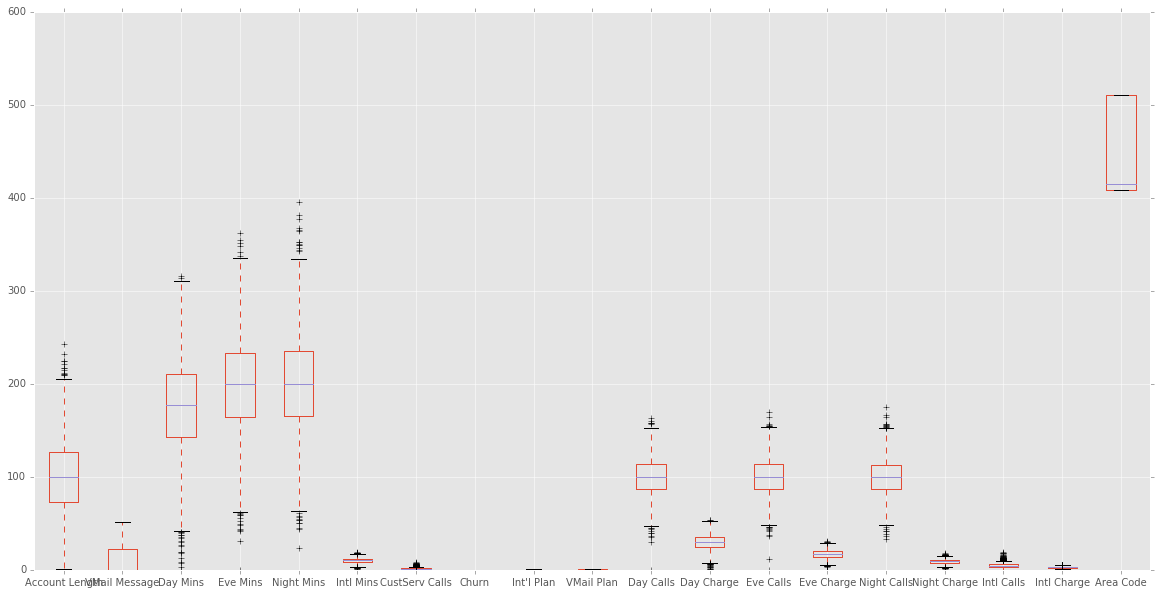

In [41]:
false_df.plot(kind = 'box', figsize = (20, 10))

In [ ]:
#the features where the mean looks different are day mins, eve mins, and day charge, but i can barely see the others

In [ ]:
# i'll try logistic regression and RF again with only those three features and see what happens

In [90]:
Z = df[ ["Day Mins", "Eve Mins", "Day Charge"] ]

In [91]:
e = df.Churn

In [92]:
train_Z, test_Z, train_e, test_e = cross_validation.train_test_split(Z, e, train_size = .6, random_state = 0)

In [93]:
model2 = linear_model.LogisticRegression().\
    fit(train_Z, train_e)

In [94]:
model2.fit(train_Z, train_e)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
model2.score(train_Z, train_e)

0.84942471235617811

In [96]:
cross_validation.cross_val_score(model2, train_Z, train_e, cv = 5).mean()

0.84942568391052442

In [97]:
train_c_hat_2 = cross_validation.cross_val_predict(model2, train_Z, train_e)

In [98]:
pd.crosstab(train_c_hat_2, train_e, rownames = ['Predicted'], colnames = ['True'])

True,0,1
Predicted,,
0,1698,301


In [51]:
#this is terrible!! 
#it predicted 0 for all of them and was still right 85% of the time! 
#so having fewer features in my logit did not help


In [ ]:
#i'm going to look more at true_df and false_df and see if there are any insights i can glean
#maybe i could bring an analysis that certain features are correlated with churn
#and that we could investigate those

In [99]:
true_df.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.0,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,102.664596,5.115942,206.914079,212.410145,205.231677,10.70000,2.229814,1.0,0.283644,0.165631,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805
std,39.467820,11.860138,68.997792,51.728910,47.132825,2.79319,1.853275,0.0,0.451233,0.372135,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270
min,1.000000,0.000000,0.000000,70.900000,47.400000,2.00000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,48.000000,6.030000,49.000000,2.130000,1.000000,0.540000,408.000000
25%,76.000000,0.000000,153.250000,177.100000,171.250000,8.80000,1.000000,1.0,0.000000,0.000000,87.500000,26.055000,87.000000,15.055000,85.000000,7.705000,2.000000,2.380000,408.000000
50%,103.000000,0.000000,217.600000,211.300000,204.800000,10.60000,2.000000,1.0,0.000000,0.000000,103.000000,36.990000,101.000000,17.960000,100.000000,9.220000,4.000000,2.860000,415.000000
75%,127.000000,0.000000,265.950000,249.450000,239.850000,12.80000,4.000000,1.0,1.000000,0.000000,116.500000,45.210000,114.000000,21.205000,115.000000,10.795000,5.000000,3.460000,510.000000
max,225.000000,48.000000,350.800000,363.700000,354.900000,20.00000,9.000000,1.0,1.000000,1.000000,165.000000,59.640000,168.000000,30.910000,158.000000,15.970000,20.000000,5.400000,510.000000


In [100]:
false_df.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Churn,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.0,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,0.0,0.065263,0.295439,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
std,39.882350,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,0.0,0.247033,0.456320,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,73.000000,0.000000,142.825000,164.500000,165.900000,8.400000,1.000000,0.0,0.000000,0.000000,87.000000,24.282500,87.000000,13.980000,87.000000,7.470000,3.000000,2.270000,408.000000
50%,100.000000,0.000000,177.200000,199.600000,200.250000,10.200000,1.000000,0.0,0.000000,0.000000,100.000000,30.120000,100.000000,16.970000,100.000000,9.010000,4.000000,2.750000,415.000000
75%,127.000000,22.000000,210.300000,233.200000,234.900000,12.000000,2.000000,0.0,0.000000,1.000000,114.000000,35.750000,114.000000,19.820000,113.000000,10.570000,6.000000,3.240000,510.000000
max,243.000000,51.000000,315.600000,361.800000,395.000000,18.900000,8.000000,0.0,1.000000,1.000000,163.000000,53.650000,170.000000,30.750000,175.000000,17.770000,19.000000,5.100000,510.000000


In [ ]:
#i'm eyeballing things that look like the mean is off, but i think it would better if i engineered some features
#i notice that int'l plan is really different between churn/no churn, but intl minutes is the same
#i'll explore one more time with that

In [137]:
#i HATE this col "int'l plan" so i will try to rename it
true_df=true_df.rename(columns = {"Int'l Plan":'Intl_Plan'})
#it worked 


In [138]:
#i HATE this col "int'l plan" so i will try to rename it
true_df=true_df.rename(columns = {"Intl Mins":'Intl_Mins'})
#it worked 
true_df.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl_Mins,CustServ Calls,Churn,Intl_Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.0,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,102.664596,5.115942,206.914079,212.410145,205.231677,10.70000,2.229814,1.0,0.283644,0.165631,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,437.817805
std,39.467820,11.860138,68.997792,51.728910,47.132825,2.79319,1.853275,0.0,0.451233,0.372135,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,42.792270
min,1.000000,0.000000,0.000000,70.900000,47.400000,2.00000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,48.000000,6.030000,49.000000,2.130000,1.000000,0.540000,408.000000
25%,76.000000,0.000000,153.250000,177.100000,171.250000,8.80000,1.000000,1.0,0.000000,0.000000,87.500000,26.055000,87.000000,15.055000,85.000000,7.705000,2.000000,2.380000,408.000000
50%,103.000000,0.000000,217.600000,211.300000,204.800000,10.60000,2.000000,1.0,0.000000,0.000000,103.000000,36.990000,101.000000,17.960000,100.000000,9.220000,4.000000,2.860000,415.000000
75%,127.000000,0.000000,265.950000,249.450000,239.850000,12.80000,4.000000,1.0,1.000000,0.000000,116.500000,45.210000,114.000000,21.205000,115.000000,10.795000,5.000000,3.460000,510.000000
max,225.000000,48.000000,350.800000,363.700000,354.900000,20.00000,9.000000,1.0,1.000000,1.000000,165.000000,59.640000,168.000000,30.910000,158.000000,15.970000,20.000000,5.400000,510.000000


In [139]:
pd.crosstab(true_df.Intl_Plan, true_df.Intl_Mins.mean())


col_0,10.7
Intl_Plan,
0,346
1,137


In [140]:
false_df=false_df.rename(columns = {"Int'l Plan":'Intl_Plan'})
false_df=false_df.rename(columns = {"Intl Mins":'Intl_Mins'})
#it worked 
false_df.describe()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl_Mins,CustServ Calls,Churn,Intl_Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area Code
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.0,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000
mean,100.793684,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,0.0,0.065263,0.295439,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,437.074737
std,39.882350,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,0.0,0.247033,0.456320,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,42.306156
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,73.000000,0.000000,142.825000,164.500000,165.900000,8.400000,1.000000,0.0,0.000000,0.000000,87.000000,24.282500,87.000000,13.980000,87.000000,7.470000,3.000000,2.270000,408.000000
50%,100.000000,0.000000,177.200000,199.600000,200.250000,10.200000,1.000000,0.0,0.000000,0.000000,100.000000,30.120000,100.000000,16.970000,100.000000,9.010000,4.000000,2.750000,415.000000
75%,127.000000,22.000000,210.300000,233.200000,234.900000,12.000000,2.000000,0.0,0.000000,1.000000,114.000000,35.750000,114.000000,19.820000,113.000000,10.570000,6.000000,3.240000,510.000000
max,243.000000,51.000000,315.600000,361.800000,395.000000,18.900000,8.000000,0.0,1.000000,1.000000,163.000000,53.650000,170.000000,30.750000,175.000000,17.770000,19.000000,5.100000,510.000000


In [143]:
pd.crosstab(false_df.Intl_Plan, false_df.Intl_Mins.mean())


col_0,10.158877193
Intl_Plan,
0,2664
1,186


In [ ]:
#well, even though the means are the same, a far greater proprotion of people who churn have an international plan

In [ ]:
#I think I would recommend the following to this company:
#collect more demographic data on where people live, primary reason for getting the service
#perhaps make an option to turn off your international plan if you're note using it
#or suggest changing the pricing on the international plan
#if they could get fewer people to leave the service, they could charge less for the international plan 
#if they charge less for the international plan, they may get fewer people leaving
# i would possibly recommend that they try a few different pricing strategies with different groups, and 
    #have a control group, and then see how they fare
#also, i would recommend that they keep an eye on customers with the following attributes, as they correlate with churn
    #international plan == 1
    #Day mins being high
    #more than 1 customer service call
    #no voicemail plan
    #high day charge
#i'm betting that there are other factors that determine the characteristics of the above features
#for example, maybe the people with high day mins, 1+ cust serv call, and no vmail plan are people who are 
    #using the service to make calls like election polling, or robocalls or scams
    #maybe they have other characteristics in common, like their reason for getting the plan
    #or the number of calls per day and length, or their age, or something

In [147]:
df.corr().Churn

Account Length    0.016541
VMail Message    -0.089728
Day Mins          0.205151
Eve Mins          0.092796
Night Mins        0.035493
Intl_Mins         0.068239
CustServ Calls    0.208750
Churn             1.000000
Intl_Plan         0.259852
VMail Plan       -0.102148
Day Calls         0.018459
Day Charge        0.205151
Eve Calls         0.009233
Eve Charge        0.092786
Night Calls       0.006141
Night Charge      0.035496
Intl Calls       -0.052844
Intl Charge       0.068259
Area Code         0.006174
Name: Churn, dtype: float64